In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
train_path='./drive/MyDrive/Colab Notebooks/cat_and_dog/training_set/'
test_path='./drive/MyDrive/Colab Notebooks/cat_and_dog/test_set/'

In [21]:
#data generator 
from keras.preprocessing.image import ImageDataGenerator
train_data=ImageDataGenerator(rescale=1./255)
train_set=train_data.flow_from_directory(directory=train_path,target_size=(128,128),batch_size=32,color_mode="rgb",class_mode = 'binary')

Found 1580 images belonging to 2 classes.


In [22]:
test_data=ImageDataGenerator(rescale=1./255)
test_set=train_data.flow_from_directory(directory=test_path,target_size=(128,128),batch_size=32,color_mode="rgb",class_mode = 'binary')

Found 2033 images belonging to 2 classes.


Build model

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
model = Sequential()

# first layer 
model.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# second layer
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# flattern layer
model.add(Flatten())

# Dense layer
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 256)               1

In [25]:
# compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
model_history=model.fit(train_set,validation_data=test_set,epochs=10)

Epoch 1/10
50/50 [==============================] - 352s 7s/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 140.5261 - val_accuracy: 0.4978
Epoch 2/10
50/50 [==============================] - 61s 1s/step - loss: 3.6083e-37 - accuracy: 1.0000 - val_loss: 142.3481 - val_accuracy: 0.4978
Epoch 3/10
50/50 [==============================] - 62s 1s/step - loss: 3.4413e-37 - accuracy: 1.0000 - val_loss: 142.3607 - val_accuracy: 0.4978
Epoch 4/10
50/50 [==============================] - 61s 1s/step - loss: 3.4413e-37 - accuracy: 1.0000 - val_loss: 142.3607 - val_accuracy: 0.4978
Epoch 5/10
50/50 [==============================] - 61s 1s/step - loss: 3.4413e-37 - accuracy: 1.0000 - val_loss: 142.3607 - val_accuracy: 0.4978
Epoch 6/10
50/50 [==============================] - 63s 1s/step - loss: 3.4413e-37 - accuracy: 1.0000 - val_loss: 142.3607 - val_accuracy: 0.4978
Epoch 7/10
50/50 [==============================] - 63s 1s/step - loss: 3.4413e-37 - accuracy: 1.0000 - val_loss: 142.3607 - va

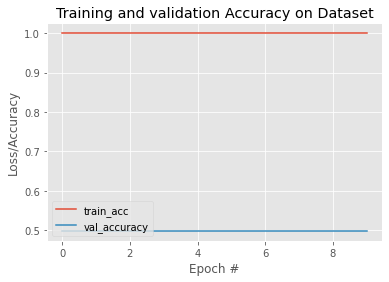

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, 10),model_history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10),model_history.history["val_accuracy"], label="val_accuracy")

plt.title("Training and validation Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [28]:
#check image 
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('./drive/MyDrive/Colab Notebooks/cat_and_dog/test_set/dogs/dog.4662.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog
